In [4]:
import numpy as np
from astropy.table import Table
import thecannon as tc
import matplotlib.pyplot as p

In [5]:
#paths
table_path = '/Users/catherinemanea/Documents/BP_RP/apogee_bprp_params/apogee_bprp_params/'
spec_path = '/Users/catherinemanea/Documents/BP_RP/apogee_bprp_params/apogee_bprp_params/' #assumes spec are in directory 'apogee' inside this path
fig_path = '/Users/catherinemanea/Documents/BP_RP/apogee_bprp_params/apogee_bprp_params/'

In [6]:
t = Table.read(table_path+'synth_apogee_0.fits')
t = t[t['synth']]

In [7]:
#loading in spec with max normalization
size = len(t) #adjust if you only want to play with subset of data

for i in range(size):
    if i%1000 == 0:
        print(np.round(100*i/size, 2), '%')
    Teff = t['Teff'][i] ; logg = t['logg'][i] ; feh = t['feh'][i] ;  a = t['A_v'][i] ; s = t['SNR'][i]
    filename = '%s_g%s_f%s_a%s_n%s.txt'%(str(Teff),str(logg),str(feh),str(a),str(s))
    try:
        w, fbp, ebp = np.loadtxt(spec_path+'apogee/Bp_'+filename,usecols=(0,1,2),skiprows=1,unpack=True)
        wr, frp, erp = np.loadtxt(spec_path+'apogee/Rp_'+filename,usecols=(0,1,2),skiprows=1,unpack=True)
       
    except:  
        try:
            formatter = "{0:.12g}"
            Teff2 = formatter.format(Teff)
            logg2 = formatter.format(logg)
            feh2 = formatter.format(feh)
            s2 = formatter.format(s)
            a2 = formatter.format(a)
            filename = '%s_g%s_f%s_a%s_n%s.txt'%(str(Teff2),str(logg2),str(feh2),str(a2),str(s2))
            w, fbp, ebp = np.loadtxt(spec_path+'apogee/Bp_'+filename,usecols=(0,1,2),skiprows=1,unpack=True)
            wr, frp, erp = np.loadtxt(spec_path+'apogee/Rp_'+filename,usecols=(0,1,2),skiprows=1,unpack=True)
            
        except:
            try:
                formatter = "{0:.12g}"
                logg2 = formatter.format(logg)
                feh2 = formatter.format(feh)
                s2 = formatter.format(s)
                a2 = formatter.format(a)
                filename = '%s_g%s_f%s_a%s_n%s.txt'%(str(Teff),str(logg2),str(feh2),str(a2),str(s2))
                w, fbp, ebp = np.loadtxt(spec_path+'apogee/Bp_'+filename,usecols=(0,1,2),skiprows=1,unpack=True)
                wr, frp, erp = np.loadtxt(spec_path+'apogee/Rp_'+filename,usecols=(0,1,2),skiprows=1,unpack=True)
                
            except:
                formatter = "{0:.12g}"
                Teff2 = formatter.format(Teff)
                logg2 = formatter.format(logg)
                feh2 = formatter.format(feh)
                a2 = formatter.format(a)
                s = "{0:.1f}".format(s)
                filename = '%s_g%s_f%s_a%s_n%s.txt'%(str(Teff2),str(logg2),str(feh2),str(a2),str(s))
                w, fbp, ebp = np.loadtxt(spec_path+'apogee/Bp_'+filename,usecols=(0,1,2),skiprows=1,unpack=True)
                wr, frp, erp = np.loadtxt(spec_path+'apogee/Rp_'+filename,usecols=(0,1,2),skiprows=1,unpack=True)

    w = w[~np.isnan(ebp)]
    wr = wr[~np.isnan(erp)]
    fbp = fbp[~np.isnan(ebp)]
    ebp = ebp[~np.isnan(ebp)]
    frp = frp[~np.isnan(erp)]
    erp = erp[~np.isnan(erp)]
    
    if i == 0:
        xs = np.zeros((len(t[:size]),len(np.concatenate([fbp,frp]))))
        bps = np.zeros((len(t[:size]),len(fbp)))
        rps = np.zeros((len(t[:size]),len(frp)))
        xerrs = np.zeros((len(t[:size]),len(np.concatenate([fbp,frp]))))
        standard_errs = np.zeros((len(t[:size]),len(np.concatenate([fbp,frp]))))
    
    f = np.concatenate([fbp,frp])
    errs = 1.0/np.sqrt(np.concatenate([ebp,erp])/np.max(f))
    xs[i,:] = f/np.max(f)
    bps[i,:] = fbp/np.max(fbp)
    rps[i,:] = frp/np.max(frp)
    xerrs[i,:] = errs
    standard_errs[i,:] = np.concatenate([ebp,erp])/np.max(f)
    wf = np.concatenate([w,wr])
    

0.0 %
1.61 %
3.22 %
4.83 %
6.44 %
8.05 %
9.67 %
11.28 %
12.89 %
14.5 %
16.11 %
17.72 %
19.33 %
20.94 %
22.55 %
24.16 %
25.78 %
27.39 %
29.0 %
30.61 %
32.22 %
33.83 %
35.44 %
37.05 %
38.66 %
40.27 %
41.89 %
43.5 %
45.11 %
46.72 %
48.33 %
49.94 %
51.55 %
53.16 %
54.77 %
56.38 %
58.0 %
59.61 %
61.22 %
62.83 %
64.44 %
66.05 %
67.66 %
69.27 %
70.88 %
72.49 %
74.11 %
75.72 %
77.33 %
78.94 %
80.55 %
82.16 %
83.77 %
85.38 %
86.99 %
88.6 %
90.21 %
91.83 %
93.44 %
95.05 %
96.66 %
98.27 %
99.88 %


In [75]:
subset = np.where((t['Teff'] < 5500) & (t['Teff'] > 5000) & (t['A_v'] < .5) & (t['A_v'] > 0))
t_subset = t[subset]
xs_subset = xs[subset]
xerrs_subset = xerrs[subset]

In [76]:
#making training and testing sets
# train_inds = np.random.choice(range(len(t)),int(.6*len(t)),replace=False)
# test_inds = np.array(list(set(range(len(t)))- set(train_inds)),dtype='int')
print(len(t[subset]))

np.random.seed(888) # For reproducibility.
q = np.random.randint(0, 10, len(t_subset)) % 10
validate_set = np.where((q<=1))[0]
train_set = np.where((q>1))[0]
train_inds = train_set
test_inds = validate_set

train_xs = xs_subset[train_inds]
train_errs = xerrs_subset[train_inds]
bad = np.where(np.isnan(train_xs))
train_xs[bad] = 0.0000001
bad = np.where(np.isnan(train_errs))
train_errs[bad] = 0.0000001
bad = np.where(train_xs==np.inf)
train_xs[bad] = 1e6
bad = np.where(train_errs==np.inf)
train_errs[bad] = 1e6

test_xs = xs_subset[test_inds]
test_errs = xerrs_subset[test_inds]
bad = np.where(np.isnan(test_xs))
test_xs[bad] = 0.0000001
bad = np.where(np.isnan(test_errs))
test_errs[bad] = 0.0000001
bad = np.where(test_xs==np.inf)
test_xs[bad] = 1e6
bad = np.where(test_errs==np.inf)
test_errs[bad] = 1e6

train_t = t_subset[train_inds]
test_t = t_subset[test_inds]

3302


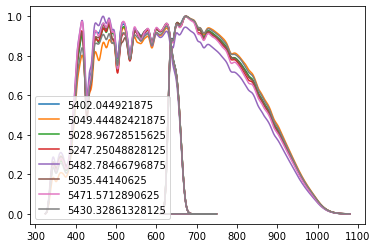

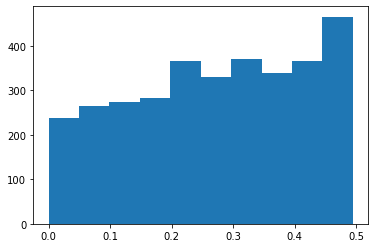

In [77]:
teffs = t_subset['Teff']
loggs = t_subset['logg']
fehs = t_subset['feh']
avs = t_subset['A_v']
snrs = t_subset['SNR']

p.figure()
N=1
for i in range(8):
    p.plot(wf, xs_subset[i], label=t_subset['Teff'][i])
p.legend()
p.show()

p.figure()
p.hist(avs, bins=10)
p.show()

In [78]:
# Specify the vectorizer.
vectorizer = tc.vectorizer.PolynomialVectorizer(("Teff", "logg", "feh","A_v"), 2)
# set up model
model = tc.CannonModel(train_t, train_xs, train_errs,
                       vectorizer=vectorizer, dispersion=wf)


# Train the model!
model.train()



2022-05-25 10:27:36,462 [INFO] Training 4-label CannonModel with 2630 stars and 897 pixels/star
stty: 2022-05-25 10:27:36,480 [DEBUG] Couldn't get screen size. Progressbar may look odd.
stdin isn't a terminal


[================================================================================================================] 100% (3s)                               


(array([[ 1.42010510e-03,  3.85881539e-04,  3.57110327e-04, ...,
         -4.02088279e-04,  1.14221015e-04, -3.31860380e-05],
        [ 2.75732405e-03,  7.45875215e-04,  6.90504007e-04, ...,
         -7.73978460e-04,  2.17800505e-04, -6.52778284e-05],
        [ 5.04824928e-03,  1.35923315e-03,  1.25861702e-03, ...,
         -1.40430450e-03,  3.91207589e-04, -1.21176361e-04],
        ...,
        [ 2.70448932e-04, -3.85810968e-05, -2.09928565e-06, ...,
         -2.38334292e-06, -7.39798360e-06, -1.37760575e-05],
        [ 2.34611369e-04, -3.35112798e-05, -1.82627322e-06, ...,
         -2.07846325e-06, -6.40150735e-06, -1.19803956e-05],
        [ 2.01577295e-04, -2.88265105e-05, -1.54380079e-06, ...,
         -1.80904264e-06, -5.53306314e-06, -1.02498441e-05]]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
 

In [72]:
# from multiprocessing import Pool
# pool = Pool()

In [38]:
# res = pool.apply_async(model.test, [test_xs[:10], test_errs[:10]])


Process SpawnPoolWorker-93:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 368, in get
    return _ForkingPickler.loads(res)
  File "/opt/anaconda3/lib/python3.9/site-packages/thecannon/vectorizer/base.py", line 51, in __setstate__
    model_name, kwds = kwds
UnboundLocalError: local variable 'kwds' referenced before assignment


In [79]:
#infer for train
test_labels, cov, metadata = model.test(test_xs, test_errs, threads=1)

#fig_comparison = tc.plot.one_to_one(model, test_labels, latex_label_names=[r"T_{\rm eff}",r"\log{g}",r"[{\rm Fe}/{\rm H}]",r"{\rm A_V}"])
#fig_comparison.savefig(fig_path+"one-to-one.png", dpi=300)

stty: stdin isn't a terminal
2022-05-25 10:27:46,601 [DEBUG] Couldn't get screen size. Progressbar may look odd.
2022-05-25 10:27:46,604 [INFO] Running test step on 672 spectra


[================================================================================================================] 100% (7s)                              


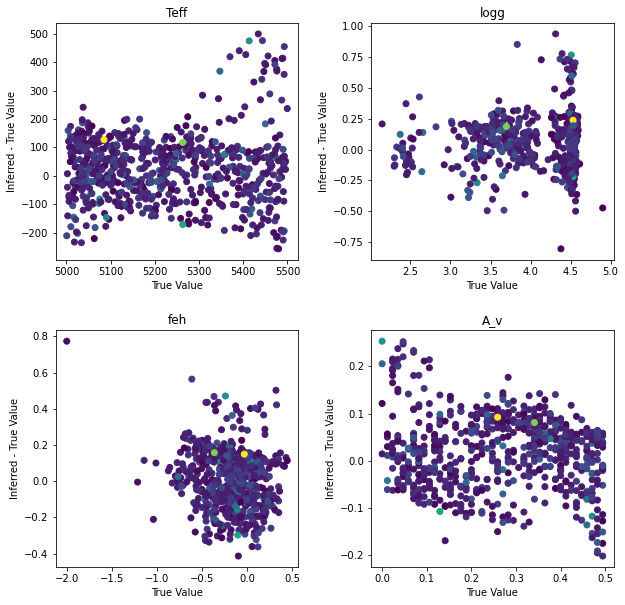

In [82]:
fig, axs = p.subplots(2,2,figsize=(10,10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, param in enumerate(['Teff', 'logg', 'feh', 'A_v']):
    ax = np.ravel(axs)[i]
    ax.scatter(t_subset[param][test_inds],test_labels[:,i] - t_subset[param][test_inds],c=t_subset['SNR'][test_inds])
    ax.set_title(param)
    ax.set_xlabel("True Value")
    ax.set_ylabel("Inferred - True Value")

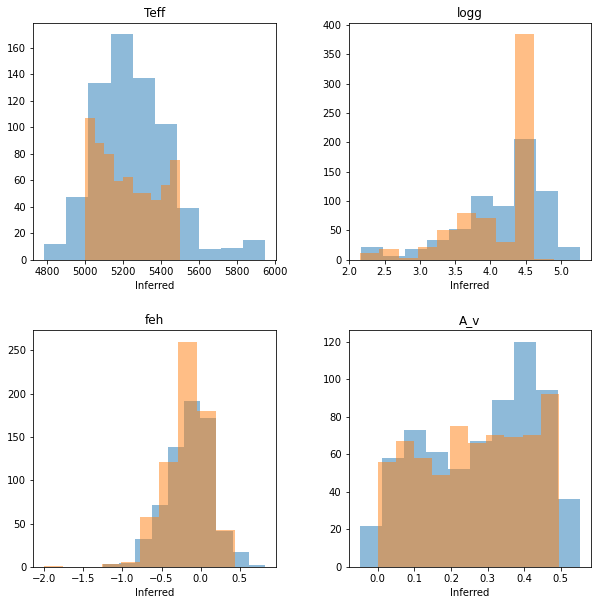

In [85]:
fig, axs = p.subplots(2,2,figsize=(10,10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, param in enumerate(['Teff', 'logg', 'feh', 'A_v']):
    ax = np.ravel(axs)[i]
    ax.hist(test_labels[:,i], alpha=.5, label='Inferred')
    ax.hist(t_subset[param][test_inds], alpha=.5, label='True')
    ax.set_title(param)
    ax.set_xlabel("Inferred")

In [51]:
print(np.mean(test_labels[:,0]))
print(np.mean(np.abs(test_labels[:,0]-t['Teff'][test_inds])))
print(np.mean(np.abs(test_labels[:,1]-t['logg'][test_inds])))
print(np.mean(t['Teff'][test_inds]))

4738.856386230327
351.58016623076395
0.980726118463609
4864.145472623186


In [46]:
print(np.min(t['Teff'][test_inds]), np.max(t['Teff'][test_inds]))
print(np.min(t['Teff'][train_inds]), np.max(t['Teff'][train_inds]))

3358.777099609375 6866.439453125
3236.025146484375 6885.6650390625
